In [1]:
import pandas as pd
import pydub
import os
import tqdm
from utils import get_end_from_start, get_start_end_from_file
from data import read_interview, get_features
import matplotlib.pyplot as plt
import numpy as np
import pickle
from lime import lime_tabular    
import dill

pydub.AudioSegment.converter = r"C:/Users/Kinza/anaconda3/envs/pie/Library/bin/ffmpeg.exe" #CHANGE THIS

# Load videos and extract features

In [ ]:
# Load videos and calculate feats
video_folder = 'predict/'
df_name = 'times.xlsx'  #Name of an Excel containing columns 'email','question','start' and 'end'

filenames = tqdm(os.listdir(video_folder))
df_startend = get_start_end_from_file(df_name)

interviews = []
for f in filenames : 
    interviews.append(read_interview(video_folder,df_startend,f))

# Tidy feats and save to csv so you don't have to recalculate everything
feats = [item for sublist in interviews for item in sublist]
feats = get_features(feats)
feats.to_csv("new_features.csv")

In [2]:
feats = pd.read_csv('audio_lexic.csv')
feats = feats.set_index('id')

In [3]:
feats.head()

,voicedcount,npause,originaldur,intensity_duration,speakingrate,articulationrate,asd,nb_pauses,mean_pauses,max_pauses,...,book_med,book_std,book_95c,book_max,phon_min,phon_mean,phon_med,phon_std,phon_95c,phon_max
id,,,,,,,,,,,,,,,,,,,,,
alexis.przybylak@student.isae-supaero.fr_1,457.0,26.0,80.00,80.00,5.712500,7.409209,0.134967,0.024096,0.030120,0.036145,...,128.990,6864.873575,18490.5700,38928.92,1,3.947368,3.0,2.289726,8.2,10
alexis.przybylak@student.isae-supaero.fr_2,395.0,18.0,67.90,67.90,5.817378,7.254628,0.137843,0.028571,0.028571,0.028571,...,72.565,5616.306821,12072.3295,38928.92,1,4.326087,4.0,2.596439,9.0,12
alexis.przybylak@student.isae-supaero.fr_3,530.0,52.0,108.74,108.74,4.874011,7.246773,0.137992,0.018182,0.018182,0.018182,...,121.280,4936.957705,8898.5215,38928.92,1,3.475000,3.0,2.061401,8.0,11
anna.gounot@student.isae-supaero.fr_1,512.0,23.0,90.00,90.00,5.688889,6.786850,0.147344,0.000000,0.000000,0.000000,...,66.150,4554.970404,8732.5700,38928.92,1,4.074534,3.0,2.378874,9.0,13
anna.gounot@student.isae-supaero.fr_2,498.0,26.0,87.94,87.94,5.662952,6.713581,0.148952,0.022222,0.033333,0.033333,...,74.390,4285.982934,8256.2630,38928.92,1,3.748634,3.0,2.073034,7.0,12


# Visualize features

c:\Users\Kinza\Documents\GitHub\Video-interviews-analysis\visu.py:69: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


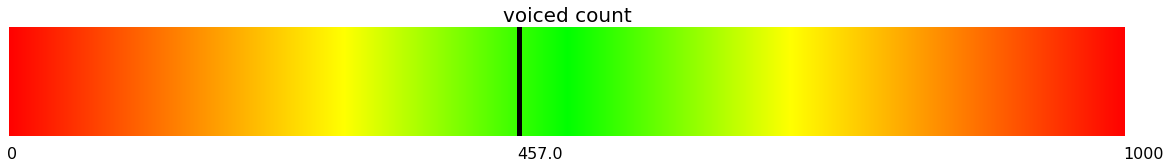

In [4]:
from visu import *
fts = feats.iloc[0,0]
heatmap_vizualisation(fts,"voiced count")

In [16]:
import ipywidgets as widgets
from ipywidgets import Layout
import seaborn as sns

def print_boxplot(email,variable):
        var = round(feats.loc[email,variable],3)

        sns.set_theme(style="whitegrid")
        ax = sns.boxplot(y=variable, data=feats)
        ax.axhline(var,c='r')

        plt.text(-0.3, var*1.005, var, horizontalalignment='left', size='small', color='red', weight='normal')

email = widgets.Select(
    options = feats.index.tolist(),
    description='Interview',
    disabled=False,
    layout = Layout(width='50%', height='80px', display='flex')
)

variable = widgets.Select(
    options = feats.columns.tolist(),
    description='Variable',
    disabled=False,
    layout = Layout(width='50%', height='80px', display='flex')
)  

widgets.interactive(print_boxplot,email=email,variable=variable)


interactive(children=(Select(description='Interview', layout=Layout(display='flex', height='80px', width='50%'…

# Load saved model and explainer

In [11]:
#Lime works only with single output 

model_name = 'RF_single_output'
loaded_model = pickle.load(open(model_name, 'rb'))

with open('explainer', 'rb') as f:
    explainer = dill.load(f)

# Predict scores

In [6]:
predictions = loaded_model.predict(feats)
#predictions = [tuple(p) for p in predictions]
predictions

# Explain results

In [12]:
# asking for explanation for LIME model

i = np.random.randint(0, feats.shape[0]) #Choose the video to explain, by default it explains a random video

exp = explainer.explain_instance(feats.iloc[i,:], loaded_model.predict_proba, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)